## NOAA Fisheries Data Challenge

At some point in the later part of the 20th century, the amount of cod changed in some drmatic ways. Use the dataset from the NOAA website to learn what happened. Record your process below.

#### Import Pandas and Dataset

In [11]:
import pandas as pnd
import matplotlib.pyplot as plt
noaa = pnd.read_csv("C:/Users/drewc/Downloads/noaa_master_data.csv")
noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109915 entries, 0 to 109914
Data columns (total 6 columns):
Year          109915 non-null int64
State Name    109915 non-null object
AFS Name      109915 non-null object
Pounds        109908 non-null object
Dollars       109894 non-null object
Conf          2813 non-null object
dtypes: int64(1), object(5)
memory usage: 5.0+ MB


#### Remove Commas from String Numbers

In [2]:
noaa['Pounds'] = noaa.Pounds.str.replace(',', '')
noaa['Dollars'] = noaa.Dollars.str.replace(',', '')
noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109915 entries, 0 to 109914
Data columns (total 6 columns):
Year          109915 non-null int64
State Name    109915 non-null object
AFS Name      109915 non-null object
Pounds        109908 non-null object
Dollars       109894 non-null object
Conf          2813 non-null object
dtypes: int64(1), object(5)
memory usage: 5.0+ MB


#### Convert String Numbers to float64

In [3]:
noaa['Pounds'] = noaa['Pounds'].astype('float')
noaa['Dollars'] = noaa['Dollars'].astype('float')
noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109915 entries, 0 to 109914
Data columns (total 6 columns):
Year          109915 non-null int64
State Name    109915 non-null object
AFS Name      109915 non-null object
Pounds        109908 non-null float64
Dollars       109894 non-null float64
Conf          2813 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


#### Drop an Unwanted Column

In [4]:
noaa = noaa.drop(['Conf', 'Dollars'], axis=1)
noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109915 entries, 0 to 109914
Data columns (total 4 columns):
Year          109915 non-null int64
State Name    109915 non-null object
AFS Name      109915 non-null object
Pounds        109908 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


#### Change Column Names

In [5]:
noaa.columns = ['Year', 'State', 'Species', 'Pounds']
noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109915 entries, 0 to 109914
Data columns (total 4 columns):
Year       109915 non-null int64
State      109915 non-null object
Species    109915 non-null object
Pounds     109908 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


#### Group By Year, State, and Species

In [7]:
group = noaa.groupby(['Year', 'State', 'Species']).sum()
group.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 99191 entries, (1945, Alabama, BLUEFISH) to (2017, Washington, TUNA, ALBACORE)
Data columns (total 1 columns):
Pounds    99191 non-null float64
dtypes: float64(1)
memory usage: 1.1+ MB


#### Reset Index to Reset Column Names

In [8]:
ready = group.reset_index(level=['Year', 'State', 'Species'])
ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99191 entries, 0 to 99190
Data columns (total 4 columns):
Year       99191 non-null int64
State      99191 non-null object
Species    99191 non-null object
Pounds     99191 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


#### Filter Dataset for Atlantic Cod in Massachusetts

In [9]:
cod = ready[ready.Species == 'COD, ATLANTIC']
MA = cod[cod.State == 'Massachusetts']
MA.info()
MA.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 260 to 98300
Data columns (total 4 columns):
Year       73 non-null int64
State      73 non-null object
Species    73 non-null object
Pounds     73 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


,Year,State,Species,Pounds
260,1945,Massachusetts,"COD, ATLANTIC",132759200.0
840,1946,Massachusetts,"COD, ATLANTIC",80352000.0
1272,1947,Massachusetts,"COD, ATLANTIC",58521100.0
1834,1948,Massachusetts,"COD, ATLANTIC",60749600.0
2522,1949,Massachusetts,"COD, ATLANTIC",50418700.0


#### Define Varriables and Create Plot with Labels, Title and Legend

Text(0.5, 1.0, 'Atlantic Cod in Massachusetts')

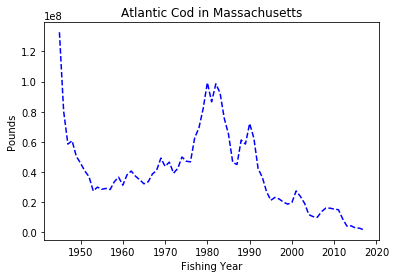

In [12]:
x = MA['Year']
y = MA['Pounds']
plt.plot(x, y, 'b--')
plt.ylabel('Pounds')
plt.xlabel('Fishing Year')
plt.title('Atlantic Cod in Massachusetts')

## Conculsion

According to the above graph, the cod harvest in Massachusetts dropped significantly beteen the early nineties and 2010. An initial assessment of the data showed that Massachusetts had the highest harvests of any atlantic state and was most affected by the drop. It is unclear whether the amount harvested before 1950 is a mistake in the recording or a large uptick due to the war effort. 